# **主題：4分類動物辨識**
## **系統開發環境需求：**
1. Python version： 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2. TensorFlow version： 2.15.0
3. Keras version： 2.15.0

In [ ]:
#colab為linux環境
!pwd #目前在哪個資料夾下(linux指令)

/content


In [ ]:
!ls -al 

total 20
drwxr-xr-x 1 root root 4096 Dec 22 01:52 .
drwxr-xr-x 1 root root 4096 Dec 22 01:50 ..
drwxr-xr-x 4 root root 4096 Dec 19 14:20 .config
drwx------ 6 root root 4096 Dec 22 01:52 drive
drwxr-xr-x 1 root root 4096 Dec 19 14:20 sample_data


In [ ]:
!ps

    PID TTY          TIME CMD
      1 ?        00:00:00 docker-init
      7 ?        00:00:01 node
     18 ?        00:00:00 oom_monitor.sh
     20 ?        00:00:00 run.sh
     22 ?        00:00:00 kernel_manager_
     24 ?        00:00:00 tail
     58 ?        00:00:05 python3 <defunct>
     59 ?        00:00:00 colab-fileshim.
    105 ?        00:00:03 jupyter-noteboo
    106 ?        00:00:00 dap_multiplexer
    360 ?        00:00:06 python3
    391 ?        00:00:01 python3
    422 ?        00:00:00 language_servic
    434 ?        00:01:35 node
    495 ?        00:00:00 bash
    497 ?        00:00:00 drive
    498 ?        00:00:00 grep
    629 ?        00:00:00 drive
    664 ?        00:00:00 fusermount <defunct>
    742 ?        00:00:00 bash
    743 ?        00:00:00 directoryprefet
    744 ?        00:00:00 tail
    745 ?        00:00:00 python3
   2914 ?        00:00:00 sleep
   2915 ?        00:00:00 ps


## **系統開發環境檢查：**

In [1]:
import sys
import tensorflow as tf
import keras

print("1. Python version：", sys.version)
print("2. TensorFlow version：", tf.__version__)
print("3. Keras version：", keras.__version__)

1. Python version： 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2. TensorFlow version： 2.15.0
3. Keras version： 2.15.0


In [2]:
#檢查是否有安裝 GPU
from tensorflow.python.client import device_lib

for d in device_lib.list_local_devices():
    print(d.name, d.device_type)
    print(d.physical_device_desc)

/device:CPU:0 CPU

/device:GPU:0 GPU
device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5


In [3]:
!nvidia-smi

Fri Jan  5 01:22:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0              29W /  70W |    103MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## **連結 Google Drive：**
### 1. unmount

In [ ]:
from google.colab import drive
drive.flush_and_unmount()

### 2. mount

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **建立資料集與相關目錄**
#先解壓縮ZIP到/content(這邊對colab來說是colab的本機，因此在content底下做檔案處理速度較快，做完所有處理後再壓縮起來解壓縮到drive)

In [5]:
import os
from os import path
import zipfile

#檢查目標資料夾是否存在？若無，新增之。
#if path.exists("/content/drive/MyDrive/112-1人工智慧/ai_ml_Final/animal4_dataset") == False:
#    os.mkdir("/content/drive/MyDrive/112-1人工智慧/ai_ml_Final/animal4_dataset")


#解壓縮資料集檔案
from zipfile import ZipFile, is_zipfile
from os import path
from tqdm import tqdm

filetoextract = "/content/drive/MyDrive/112-1人工智慧/ai_ml_Final/Animals10.zip"
directory = "/content"
#directory = "/content/drive/MyDrive/112-1人工智慧/ai_ml_Final"

# Begin extracting the file if it exists
if path.exists(filetoextract):
    if is_zipfile(filetoextract):
        print("Valid ZIP file")
        print(f"Extracting: {filetoextract}")
        with ZipFile(filetoextract, "r") as zip_ref:
            for file in tqdm(iterable=zip_ref.namelist(),
                             total=len(zip_ref.namelist())):
                # 解壓縮指定檔案至指定目錄：directory 變數
                zip_ref.extract(member=file, path=directory)
    else:
        print("Not valid ZIP file")
else:
    print(f"Cannot find: {filetoextract}")

Valid ZIP file
Extracting: /content/drive/MyDrive/112-1人工智慧/ai_ml_Final/Animals10.zip


100%|██████████| 26189/26189 [00:16<00:00, 1596.49it/s]


#選擇分類

In [6]:
import os
import shutil

folder_path = '/content/Animals10'
#folder_path = '/content/drive/MyDrive/112-1人工智慧/ai_ml_Final/Animals10'

def list_subfolders(folder_path):
    subfolders = [f.name for f in os.scandir(folder_path) if f.is_dir()]
    return subfolders

def delete_folders(folder_path, folders_to_delete):
    for folder in folders_to_delete:
        folder_to_delete_path = os.path.join(folder_path, folder)
        try:
            shutil.rmtree(folder_to_delete_path)
            print(f'Deleted folder: {folder_to_delete_path}')
        except OSError as e:
            print(f'Error deleting folder {folder_to_delete_path}: {e}')

subfolders = list_subfolders(folder_path)

print("分類:")
for i, subfolder in enumerate(subfolders, start=1):
    print(f"{i}. {subfolder}")

# 讓使用者輸入要刪除的資料夾編號，用逗號分隔
folders_to_delete_input = input("請輸入欲刪除分類的標號(用逗點分隔): ")
folders_to_delete_indices = [int(index) for index in folders_to_delete_input.split(",")]

# 根據使用者的輸入，獲取要刪除的資料夾名稱
folders_to_delete = [subfolders[index-1] for index in folders_to_delete_indices]

# 刪除資料夾
delete_folders(folder_path, folders_to_delete)

分類:
1. spider
2. sheep
3. elephant
4. chicken
5. butterfly
6. dog
7. cow
8. squirrel
9. horse
10. cat
請輸入欲刪除分類的標號(用逗點分隔): 3,4,5,6,7,10
Deleted folder: /content/Animals10/elephant
Deleted folder: /content/Animals10/chicken
Deleted folder: /content/Animals10/butterfly
Deleted folder: /content/Animals10/dog
Deleted folder: /content/Animals10/cow
Deleted folder: /content/Animals10/cat


#將所有檔案名稱加上.jpg，確保格式一致

In [7]:
import os

folder_path = r'/content/Animals10'
#folder_path = r'/content/drive/MyDrive/112-1人工智慧/ai_ml_Final/Animals10'

def rename_files(folder_path):
    for foldername, subfolders, filenames in os.walk(folder_path):
        for filename in filenames:
            if not filename.lower().endswith('.jpg'):
                file_path = os.path.join(foldername, filename)
                new_file_path = os.path.join(foldername, filename + '.jpg')
                os.rename(file_path, new_file_path)
                print(f'Renamed: {file_path} to {new_file_path}')

rename_files(folder_path)

串流輸出內容已截斷至最後 5000 行。
Renamed: /content/Animals10/sheep/sheep (727).jpeg to /content/Animals10/sheep/sheep (727).jpeg.jpg
Renamed: /content/Animals10/sheep/sheep (259).jpeg to /content/Animals10/sheep/sheep (259).jpeg.jpg
Renamed: /content/Animals10/sheep/sheep (984).jpeg to /content/Animals10/sheep/sheep (984).jpeg.jpg
Renamed: /content/Animals10/sheep/sheep (219).jpeg to /content/Animals10/sheep/sheep (219).jpeg.jpg
Renamed: /content/Animals10/sheep/sheep (100).jpeg to /content/Animals10/sheep/sheep (100).jpeg.jpg
Renamed: /content/Animals10/sheep/sheep (468).jpeg to /content/Animals10/sheep/sheep (468).jpeg.jpg
Renamed: /content/Animals10/sheep/sheep (1057).jpeg to /content/Animals10/sheep/sheep (1057).jpeg.jpg
Renamed: /content/Animals10/sheep/sheep (1273).jpeg to /content/Animals10/sheep/sheep (1273).jpeg.jpg
Renamed: /content/Animals10/sheep/sheep (711).jpeg to /content/Animals10/sheep/sheep (711).jpeg.jpg
Renamed: /content/Animals10/sheep/sheep (438).jpeg to /content/Animals10/sh

##各分類只留下1000張(隨機)，並將1000張重新編碼

In [8]:
import os
import random
import shutil

def keep_random_n_files_in_all_folders(parent_folder, n):
    # 列出parent_folder下的所有資料夾
    folders = [folder for folder in os.listdir(parent_folder) if os.path.isdir(os.path.join(parent_folder, folder))]

    for folder in folders:
        # 指定資料夾的絕對路徑
        folder_path = os.path.join(parent_folder, folder)

        # 列出資料夾下的所有檔案
        files = os.listdir(folder_path)

        # 隨機挑選n個檔案
        selected_files = random.sample(files, n)

        # 重新命名並複製檔案
        for i, file in enumerate(selected_files, start=1):
            old_path = os.path.join(folder_path, file)
            new_filename = f'{folder}{str(i).zfill(3)}.jpg'
            new_path = os.path.join(folder_path, new_filename)

            try:
                shutil.copy(old_path, new_path)
                print(f'{file} 重新命名為 {new_filename}')
            except Exception as e:
                print(f'{file} 重新命名失敗: {str(e)}')

        # 刪除檔名中包含括號的檔案
        for file in files:
            if '(' in file and ')' in file:
                file_path = os.path.join(folder_path, file)
                try:
                    os.remove(file_path)
                    print(f'{file} 刪除成功')
                except Exception as e:
                    print(f'{file} 刪除失敗: {str(e)}')

# 指定parent_folder的絕對路徑
parent_folder = r'/content/Animals10'
#parent_folder = r'/content/drive/MyDrive/112-1人工智慧/ai_ml_Final/Animals10'

# 隨機挑選每個資料夾下的1000張檔案並重新命名，再刪除檔名中包含括號的檔案
keep_random_n_files_in_all_folders(parent_folder, 1000)

串流輸出內容已截斷至最後 5000 行。
squirrel (908).jpeg.jpg 刪除成功
squirrel (1161).jpeg.jpg 刪除成功
squirrel (604).jpeg.jpg 刪除成功
squirrel (1659).jpeg.jpg 刪除成功
squirrel (1698).jpeg.jpg 刪除成功
squirrel (397).jpeg.jpg 刪除成功
squirrel (890).jpeg.jpg 刪除成功
squirrel (1843).jpeg.jpg 刪除成功
squirrel (167).jpeg.jpg 刪除成功
squirrel (347).jpeg.jpg 刪除成功
squirrel (780).jpeg.jpg 刪除成功
squirrel (1747).jpeg.jpg 刪除成功
squirrel (1236).jpeg.jpg 刪除成功
squirrel (1483).jpeg.jpg 刪除成功
squirrel (99).jpeg.jpg 刪除成功
squirrel (1224).jpeg.jpg 刪除成功
squirrel (190).jpeg.jpg 刪除成功
squirrel (955).jpeg.jpg 刪除成功
squirrel (567).jpeg.jpg 刪除成功
squirrel (19).jpeg.jpg 刪除成功
squirrel (1559).jpeg.jpg 刪除成功
squirrel (568).jpeg.jpg 刪除成功
squirrel (80).jpeg.jpg 刪除成功
squirrel (517).jpeg.jpg 刪除成功
squirrel (734).jpeg.jpg 刪除成功
squirrel (920).jpeg.jpg 刪除成功
squirrel (1448).jpeg.jpg 刪除成功
squirrel (1330).jpeg.jpg 刪除成功
squirrel (1411).jpeg.jpg 刪除成功
squirrel (1075).jpeg.jpg 刪除成功
squirrel (557).jpeg.jpg 刪除成功
squirrel (1283).jpeg.jpg 刪除成功
squirrel (1395).jpeg.jpg 刪除成功
squirrel (

In [9]:
import shutil

# 要壓縮的資料夾路徑
source_folder = '/content/Animals10'

# 壓縮成 zip 檔案
shutil.make_archive('/content/Animals10_archive', 'zip', source_folder)

# 解壓縮到目標資料夾
target_folder = '/content/drive/MyDrive/112-1人工智慧/ai_ml_Final/Animals10'
shutil.unpack_archive('/content/Animals10_archive.zip', target_folder, 'zip')

The dataset we have downloaded has following directory structure.

In [10]:
import os

def list_files_and_folders(folder_path):
    print(f"{os.path.basename(folder_path)}")
    print("|__", end=" ")

    subfolders = [f.name for f in os.scandir(folder_path) if f.is_dir()]

    for i, subfolder in enumerate(subfolders):
        print(subfolder, end="")
        if i < len(subfolders) - 1:
            print(", ", end="")
    print()

    for subfolder in subfolders:
        subfolder_path = os.path.join(folder_path, subfolder)
        print(f"    |______ {subfolder}: ", end="")

        files = [f.name for f in os.scandir(subfolder_path) if f.is_file()]

        for i, file in enumerate(files):
            print(file, end="")
            if i < len(files) - 1:
                print(", ", end="")
        print()

folder_path = '/content/drive/MyDrive/112-1人工智慧/ai_ml_Final/Animals10' 
list_files_and_folders(folder_path)


Animals10
|__ horse, sheep, spider, squirrel
    |______ horse: horse709.jpg, horse296.jpg, horse480.jpg, horse265.jpg, horse750.jpg, horse118.jpg, horse483.jpg, horse377.jpg, horse029.jpg, horse839.jpg, horse372.jpg, horse319.jpg, horse100.jpg, horse018.jpg, horse599.jpg, horse223.jpg, horse658.jpg, horse414.jpg, horse629.jpg, horse867.jpg, horse829.jpg, horse541.jpg, horse379.jpg, horse747.jpg, horse005.jpg, horse803.jpg, horse124.jpg, horse190.jpg, horse437.jpg, horse818.jpg, horse279.jpg, horse476.jpg, horse395.jpg, horse866.jpg, horse457.jpg, horse058.jpg, horse606.jpg, horse203.jpg, horse729.jpg, horse505.jpg, horse289.jpg, horse054.jpg, horse570.jpg, horse813.jpg, horse689.jpg, horse389.jpg, horse301.jpg, horse344.jpg, horse637.jpg, horse465.jpg, horse582.jpg, horse342.jpg, horse897.jpg, horse550.jpg, horse403.jpg, horse788.jpg, horse477.jpg, horse723.jpg, horse333.jpg, horse493.jpg, horse569.jpg, horse475.jpg, horse412.jpg, horse984.jpg, horse400.jpg, horse415.jpg, horse134.jpg

## **建立辨識四類圖像的深度學習模型**

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [12]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths

In [13]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import legacy
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical

In [14]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4 #梯度下降
EPOCHS = 5
BS = 32 #一次抓32張做訓練

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images("/content/drive/MyDrive/112-1人工智慧/ai_ml_Final/Animals10"))
data = []
labels = []

[INFO] loading images...


In [15]:
# loop over the image paths
for imagePath in imagePaths:
	  # extract the class label from the filename
	  label = imagePath.split(os.path.sep)[-2]

	  # load the input image (224x224) and preprocess it
	  image = load_img(imagePath, target_size=(224,224)) #原本照片大小都不一樣，統一變成˙224*224
	  image = img_to_array(image)
	  image = preprocess_input(image)

	  # update the data and labels lists, respectively
	  data.append(image)
	  labels.append(label)

# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [16]:
print(labels)

['horse' 'horse' 'horse' ... 'squirrel' 'squirrel' 'squirrel']


In [17]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [18]:
labels

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [19]:
len(labels) #訓練資料數量

4000

In [20]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
#80/20法則(因此切完會是train:4000*0.8、test:4000*0.2)
(trainX, testX, trainY, testY) = \
    train_test_split(data,
                     labels,
                     test_size=0.20,
                     stratify=labels,
                     random_state=42)

### 參數 stratify：
* 依據標籤 y，按原資料 y 中各類比例，分配給 train 和 test，
使得 train 和 test 中各類資料的比例與原資料集一樣。
* A:B:C=1:2:3
* split 後，train 和 test 中，都是 A:B:C=1:2:3
* 將 stratify=X 就是按照 X 中的比例分配
* 將 stratify=y 就是按照 y 中的比例分配
* 一般都是 = y  

In [21]:
# construct the training image generator for data augmentation
#圖像增量
aug = ImageDataGenerator(
    rotation_range=20,
	  zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [22]:
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet",
                        include_top=False,
                        input_tensor=Input(shape=(224,224,3)))

9406464/9406464 [==============================] - 1s 0us/step


In [23]:
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7,7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel) #隱藏層 全連接 128
headModel = Dropout(0.5)(headModel)
headModel = Dense(4, activation="softmax")(headModel) #2分類(原為1000分類) softmax預測機率

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	  layer.trainable = False

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

### 繪製 MobileNetV2 神經網路結構圖

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model,
                          to_file="model.png",
                          show_shapes=True)

In [ ]:
# compile our model
print("[INFO] compiling model...")
#設定優化器
opt = legacy.Adam(learning_rate=INIT_LR,
                  decay=INIT_LR/EPOCHS)

model.compile(loss="binary_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

[INFO] compiling model...


#測試(存val_accuracy最好的那趟為模型)

In [ ]:
from keras.callbacks import ModelCheckpoint
# 設定 ModelCheckpoint 回呼，監視驗證集的準確度（val_accuracy）
checkpoint = ModelCheckpoint("/content/drive/MyDrive/112-1人工智慧/ai_ml_Final/model/4classification.keras",
                             monitor="val_accuracy",
                             save_best_only=True,
                             mode="max",
                             verbose=1)

In [ ]:
H = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS,
    callbacks=[checkpoint])  # 將 ModelCheckpoint 回呼加入訓練過程

Epoch 1/5
100/100 [==============================] - ETA: 0s - loss: 0.4099 - accuracy: 0.6691
Epoch 1: val_accuracy improved from -inf to 0.96750, saving model to /content/drive/MyDrive/112-1人工智慧/ai_ml_Final/model/4classification.keras
100/100 [==============================] - 50s 414ms/step - loss: 0.4099 - accuracy: 0.6691 - val_loss: 0.1641 - val_accuracy: 0.9675
Epoch 2/5
100/100 [==============================] - ETA: 0s - loss: 0.1773 - accuracy: 0.9203
Epoch 2: val_accuracy improved from 0.96750 to 0.98000, saving model to /content/drive/MyDrive/112-1人工智慧/ai_ml_Final/model/4classification.keras
100/100 [==============================] - 41s 407ms/step - loss: 0.1773 - accuracy: 0.9203 - val_loss: 0.0792 - val_accuracy: 0.9800
Epoch 3/5
100/100 [==============================] - ETA: 0s - loss: 0.1179 - accuracy: 0.9459
Epoch 3: val_accuracy improved from 0.98000 to 0.98250, saving model to /content/drive/MyDrive/112-1人工智慧/ai_ml_Final/model/4classification.keras
100/100 [======

In [ ]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1),
                            predIdxs,
                            target_names=lb.classes_))

# serialize the model to disk
#print("[INFO] saving mask detector model...")
#model.save("/content/drive/MyDrive/112-1人工智慧/1222/model/cats_dogs_model.h5", save_format="h5")
#model.save("/content/drive/MyDrive/112-1人工智慧/ai_ml_Final/model/cats_dogs_model.keras")

[INFO] evaluating network...
25/25 [==============================] - 2s 41ms/step
              precision    recall  f1-score   support

       horse       0.97      0.99      0.98       200
       sheep       0.98      0.98      0.98       200
      spider       0.99      0.99      0.99       200
    squirrel       1.00      0.97      0.98       200

    accuracy                           0.98       800
   macro avg       0.99      0.99      0.98       800
weighted avg       0.99      0.98      0.98       800



<Figure size 640x480 with 0 Axes>

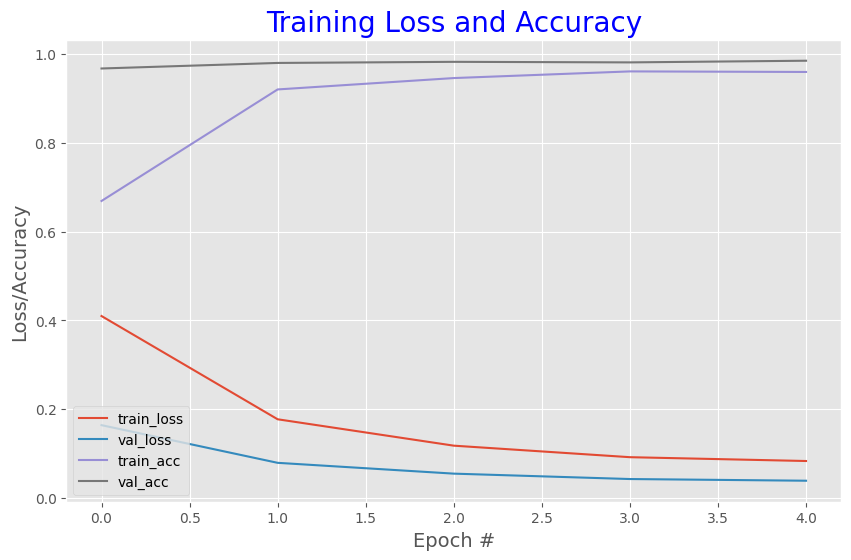

In [ ]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()

plt.figure(figsize=(10,6))
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy",
          fontsize=20,
          color="blue")
plt.xlabel("Epoch #", fontsize=14)
plt.ylabel("Loss/Accuracy", fontsize=14)
plt.legend(loc="lower left")
plt.savefig("plot")

## **五、檢視模型訓練結果**
對於分類器（Classifier）或分類演算法（Classification Algorithms），評估指標主要有 Accuracy、Precision、Recall，F1-Score、以及 ROC 和 AUC …等。

在分類型模型評估的指標中，常見的方法有以下三種：
1.	混淆矩陣（Confusion Matrix）。
2.	ROC曲線（Receiver Operating Characteristic Curve）。
3.	AUC面積（Area Under Curve）。


### (一). 分數

- 照例來看看測試資料的分數。

In [ ]:
#在測試集上進行測試
score = model.evaluate(testX, testY)
print("")
print("1. 測試資料的 Loss：", score[0])
print("2. 測試資料的 Accuracy：", str(round(score[1]*100,2))+"%")

25/25 [==============================] - 1s 44ms/step - loss: 0.0389 - accuracy: 0.9850

1. 測試資料的 Loss： 0.03892875462770462
2. 測試資料的 Accuracy： 98.5%


### (二). 顯示混淆矩陣(Confusion Matrix)
混淆矩陣是 ROC 曲線（Receiver Operating Characteristic Curve）繪製的基礎，也是衡量分類型模型準確度中最基本、最直觀、計算最簡單的方法。

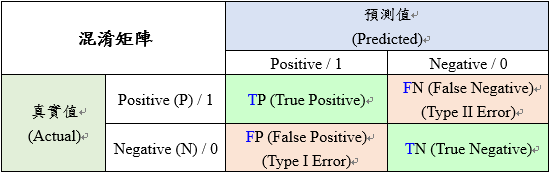

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

label_y = testY.argmax(axis=1)

cnf_matrix_test = confusion_matrix(label_y, predIdxs)
print ('Confusion Matrix :')
print(cnf_matrix_test)

Confusion Matrix :
[[199   1   0   0]
 [  4 196   0   0]
 [  1   0 199   0]
 [  1   2   3 194]]


              precision    recall  f1-score   support

       horse       0.97      0.99      0.98       200
       sheep       0.98      0.98      0.98       200
      spider       0.99      0.99      0.99       200
    squirrel       1.00      0.97      0.98       200

    accuracy                           0.98       800
   macro avg       0.99      0.99      0.98       800
weighted avg       0.99      0.98      0.98       800

[[199   1   0   0]
 [  4 196   0   0]
 [  1   0 199   0]
 [  1   2   3 194]]


Text(61.25, 0.5, 'True_number')

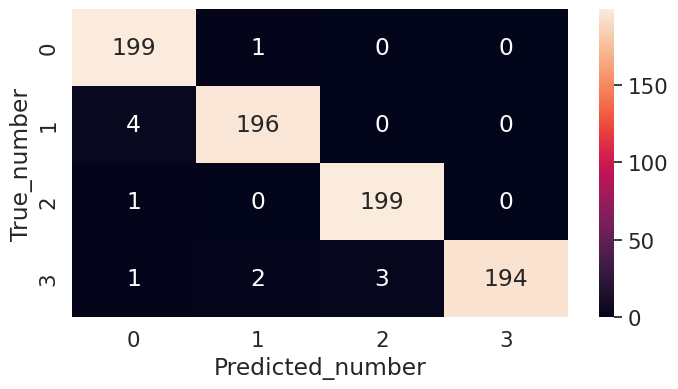

In [ ]:
# checking for performance metrices
# importing classification_report and confusion metrics
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# print classification_report
target_names = ["horse", "sheep", "spider", "squirrel"] #這邊要記得改成自己的分類
print(classification_report(label_y,
                            predIdxs,
                            target_names=target_names))

print(cnf_matrix_test)
print("="*70)

#混淆矩陣(Confusion Matrix)
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=label_y,
                                    predictions=predIdxs)
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(conf_mat, annot=True, fmt='d')

plt.xlabel('Predicted_number')
plt.ylabel('True_number')

### (三). ROC 曲線與 AUC
1. ROC 曲線的定義
ROC 就是一張圖上的曲線，透過曲線的形狀可以判定模型的好壞。那麼要想瞭解一個曲線代表什麼意思，首先要知道曲線的橫軸與縱軸分別代表什麼。

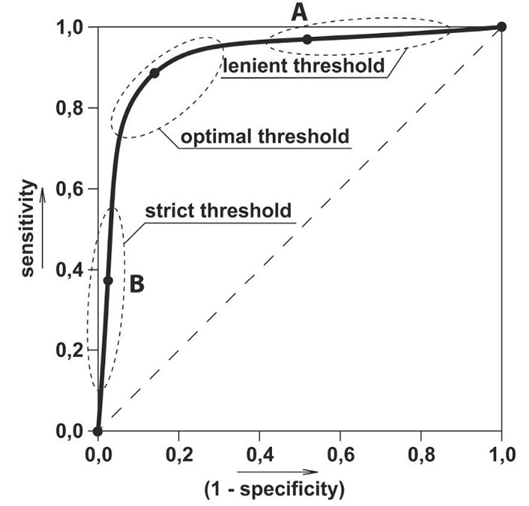

#多分類ROC曲線繪製

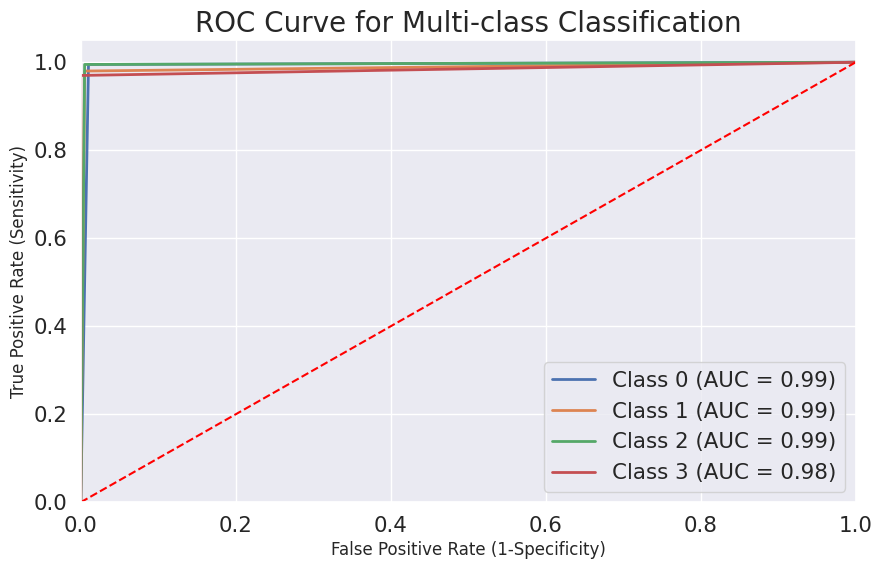

In [ ]:
%matplotlib inline
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert multi-class labels to binary labels
binary_testY = label_binarize(testY.argmax(axis=1), classes=[0, 1, 2, 3])
binary_predIdxs = label_binarize(predIdxs, classes=[0, 1, 2, 3])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(binary_testY[:, i], binary_predIdxs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10,6))

for i in range(4):
    plt.plot(fpr[i], tpr[i], lw=2, label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (1-Specificity)", fontsize=12)
plt.ylabel("True Positive Rate (Sensitivity)", fontsize=12)
plt.title("ROC Curve for Multi-class Classification", fontsize=20)
plt.legend(loc="lower right")
plt.show()

AUC(Area Under Curve)，即曲線下的面積。它就是指 ROC 曲線下的面積是多大。每一條 ROC 曲線對應一個 AUC 值。AUC 的取值在 0~1 之間。
*	AUC = 1，代表 ROC 曲線在縱軸上，預測完全準確。不管 Threshold 選什麼，預測都是 100% 正確的。
*	0.5 < AUC < 1，代表 ROC 曲線在 45 度線上方，預測優於 50/50 的猜測。需要選擇合適的閾值後，產出模型。
*	AUC = 0.5，代表 ROC 曲線在 45 度線上，預測等於 50/50 的猜測。
*	0 < AUC < 0.5，代表 ROC 曲線在 45 度線下方，預測不如 50/50 的猜測。
*	AUC = 0，代表 ROC 曲線在橫軸上，預測完全不準確。


### **任意挑選一張圖片測試**

影像路徑： /content/drive/MyDrive/112-1人工智慧/ai_ml_Final/Animals10/sheep/sheep507.jpg
1/1 [==============================] - 2s 2s/step
* 是馬的機率：0.15%
1/1 [==============================] - 0s 32ms/step
* 是羊的機率：99.85%
1/1 [==============================] - 0s 31ms/step
* 是蜘蛛的機率：0.00%
1/1 [==============================] - 0s 30ms/step
* 是松鼠的機率：0.00%


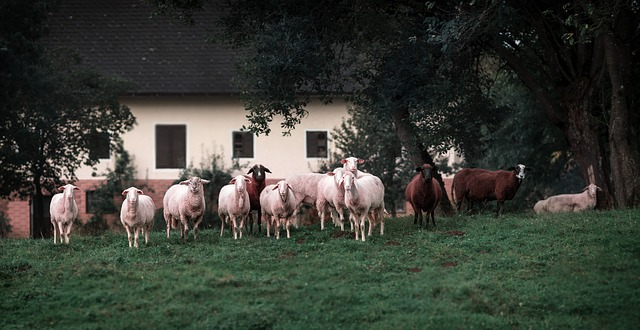

In [ ]:
import os
import random
from tensorflow.keras.preprocessing import image

# 資料夾路徑
base_path = "/content/drive/MyDrive/112-1人工智慧/ai_ml_Final/Animals10"

# 取得所有影像檔案路徑
all_image_paths = [os.path.join(root, file) for root, dirs, files in os.walk(base_path) for file in files]

# 從所有影像中隨機挑選一張
random_image_path = random.choice(all_image_paths)

# 載入圖檔，並縮放寬高為 (224, 224)
img = image.load_img(random_image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 顯示圖檔路徑
print(f"影像路徑： {random_image_path}")

# 顯示機率
print(f"* 是馬的機率：{round(model.predict(x)[0][0]*100, 2):.2f}%")
print(f"* 是羊的機率：{round(model.predict(x)[0][1]*100, 2):.2f}%")
print(f"* 是蜘蛛的機率：{round(model.predict(x)[0][2]*100, 2):.2f}%")
print(f"* 是松鼠的機率：{round(model.predict(x)[0][3]*100, 2):.2f}%")

# 顯示圖檔
from IPython.display import Image
Image(random_image_path, width=200)


In [ ]:
result = model.predict(x)
print(result)

1/1 [==============================] - 0s 22ms/step
[[1.4943238e-03 9.9848491e-01 1.8257886e-05 2.6221232e-06]]
